In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/clean.csv")

# Correlation

<AxesSubplot: >

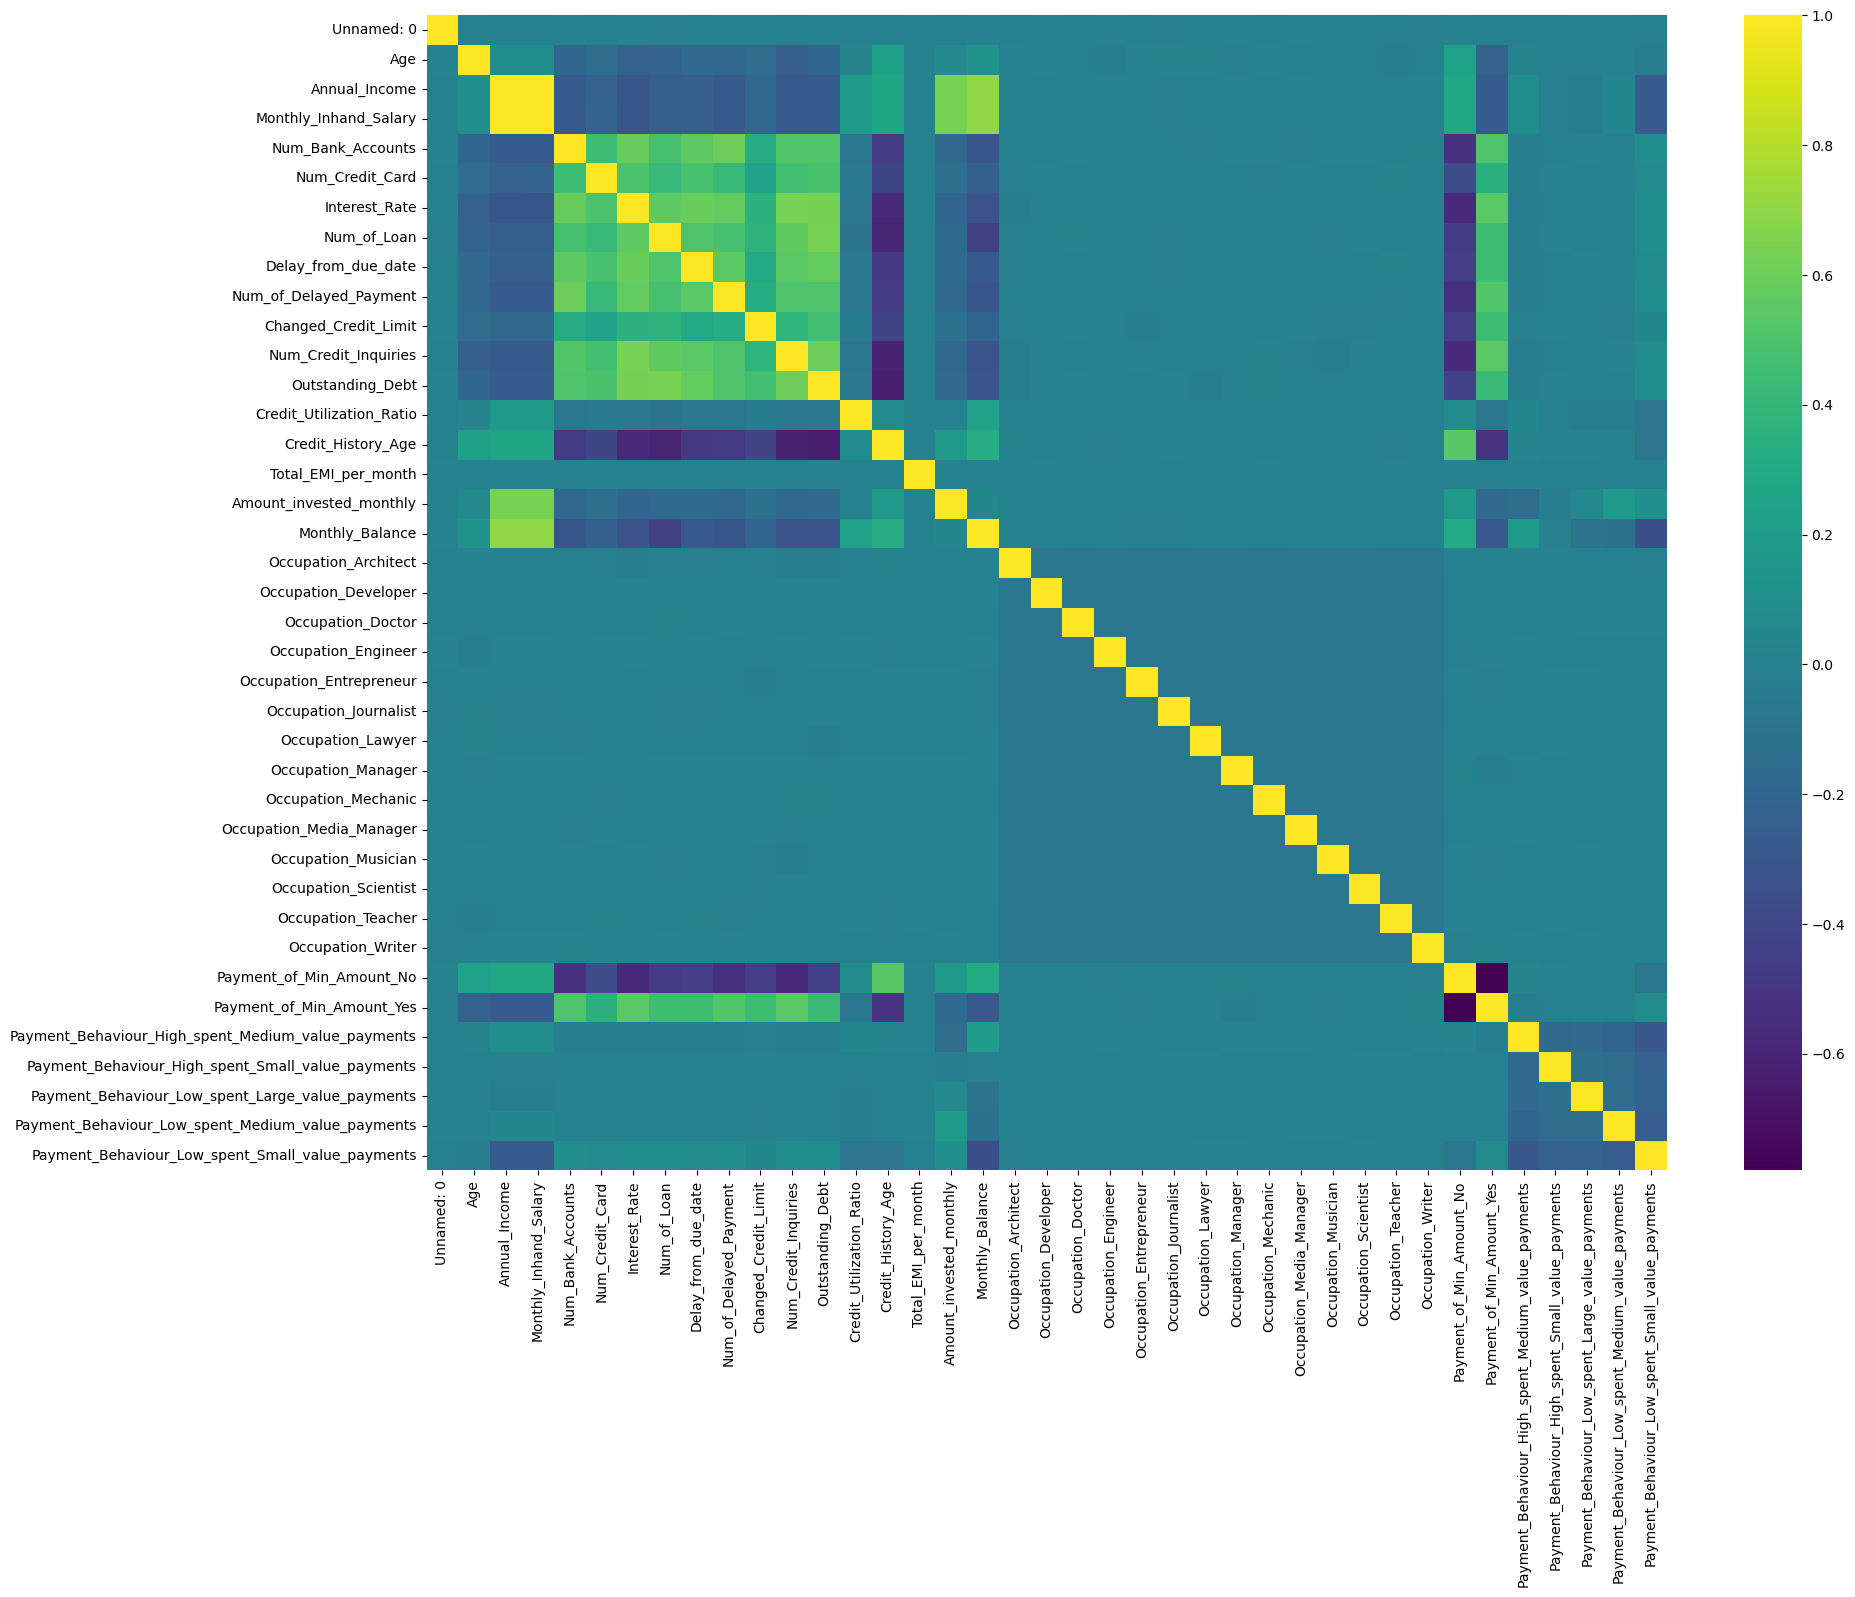

In [3]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='viridis')

Monthly_inhand_salary and Annual_Income are perfectly correlated. This makes sense, I should drop one column as it is repeated information.

Looking back, Monthly_inhand_salary had 15% missing data that we approximated with each customers mean. Annual_Income had no missing data although did have 999 values that were unfeasibly large that we corrected. 999 out of a sample of 100k is very small and so we will keep the Annual_Income column and remove the Monthly_inhand_salary.

In [4]:
df.drop('Monthly_Inhand_Salary', axis=1, inplace=True)

We also note the negative correlation between Payment_of_Min_Amount_No and Payment_of_Min_Amount_Yes. Looking back at why we have both as dummy variables, we had a third option called "NM" that I did not know how to handle at first so I just left this in. This means that while they are highly negatively correlated it is not perfect and I shall leave it as it is for now. I might come back and fix the "NM" option so that I have only "Yes" and "No" as options for this "Payment_of_Min_Amount" and then I will only have one dummy variable for this category as the other can safely be removed.

## What about good and bad credit?

In [5]:
df['good_credit'] = df['Credit_Score'].map({'Good':1,'Standard':0, 'Poor': 0})
df['poor_credit'] = df['Credit_Score'].map({'Good':0,'Standard':0, 'Poor': 1})

<AxesSubplot: >

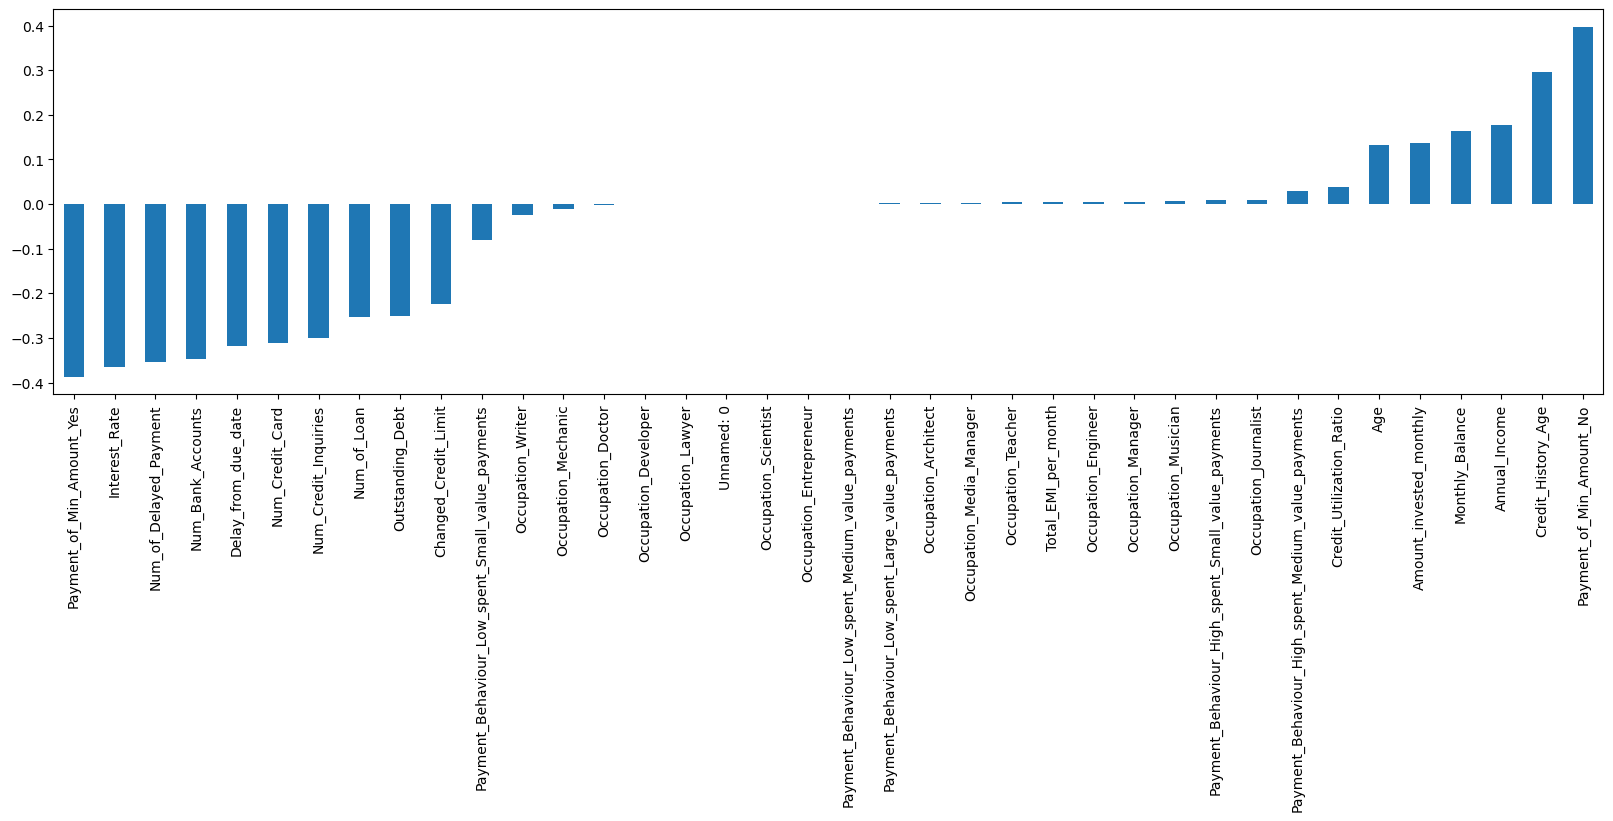

In [6]:
plt.figure(figsize=(20, 5))
df.corr()['good_credit'][:-2].sort_values().plot(kind='bar')

We see that the biggest indicator of good credit is not paying the minimum amount. Other factors that are of use are a long Credit_History_Age, high Annual_Income, high Monthly_Balance, investing lots monthly and a persons age. I suspect a persons age is actually correlated with their Credit_History_Age so I'll go back and recheck that out. It is reasonably correlated but not perfect so we will keep this information.

<AxesSubplot: >

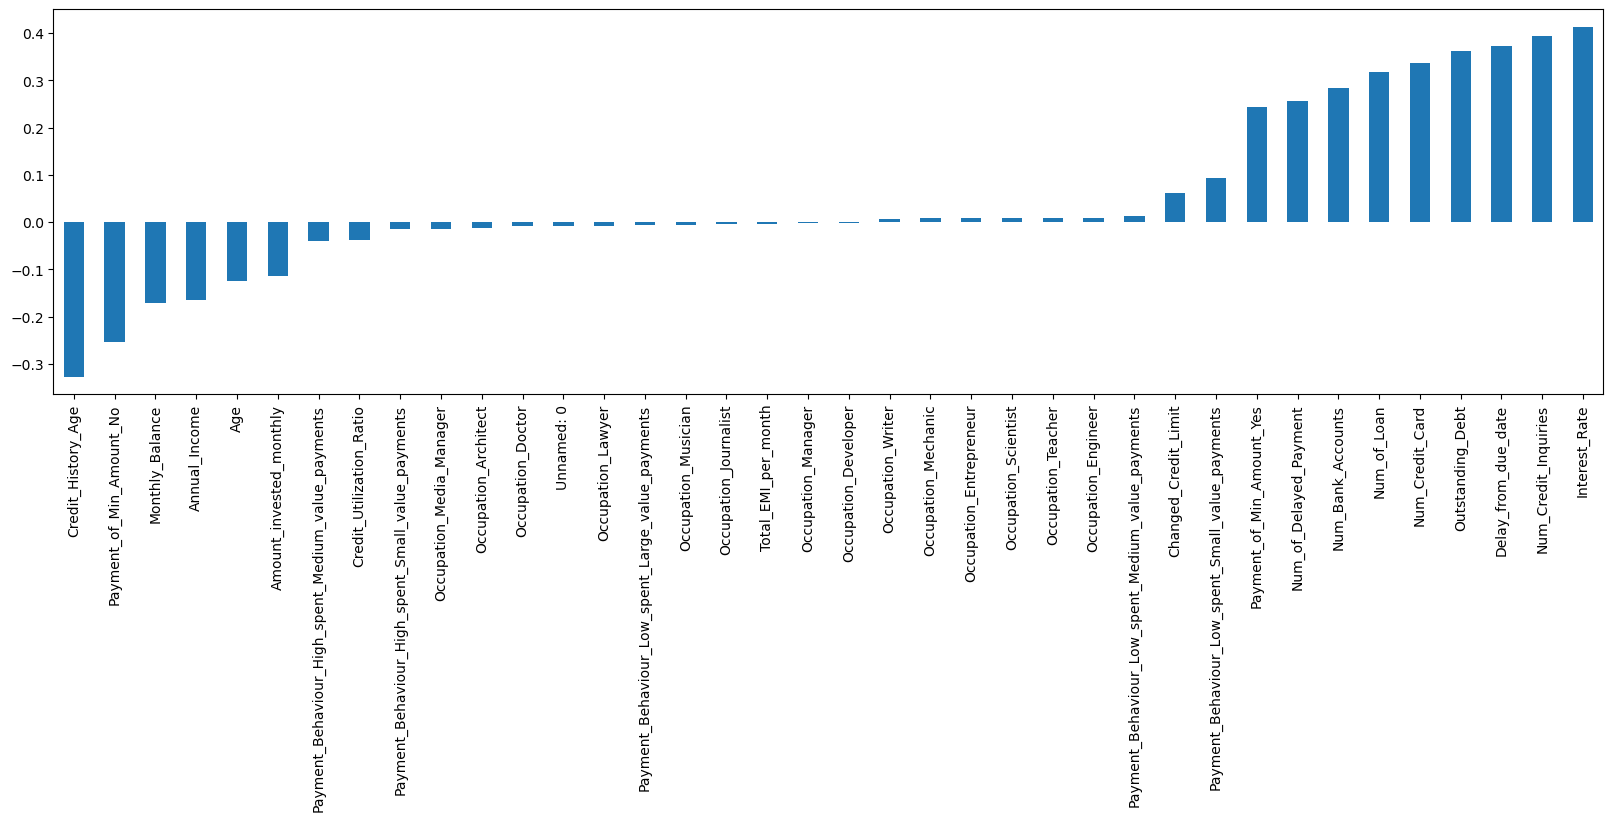

In [7]:
plt.figure(figsize=(20, 5))
df.corr()['poor_credit'][:-2].sort_values().plot(kind='bar')

Let's drop these columns we made to make this plot

In [8]:
df.drop(['good_credit', 'poor_credit'], axis=1, inplace=True)

Let's map the credit_score column from a string to numeric values.

Text(0.5, 1.0, 'Distribution of Credit Scores')

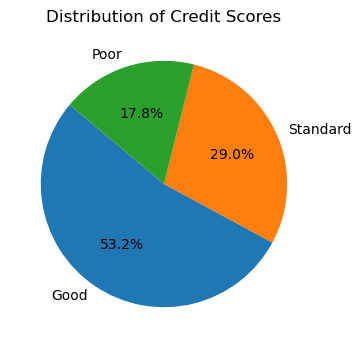

In [9]:
plt.figure(figsize=(4, 4))
plt.pie(df['Credit_Score'].value_counts(), labels=df['Credit_Score'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Scores')

We see unbalanced data. Note if we always predicted Good credit then we would be 53% accurate.

In [10]:
df['Credit_Score'] = df['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

In [11]:
df.to_csv("data/ML_ready.csv")